In [17]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import model_from_json


_model = None


def load_modal():
    print("Loaading Model------------------")
    global _model
    model_path = "model.h5" 
    _model = tf.keras.models.load_model(model_path, custom_objects={'GlorotUniform': glorot_uniform()})
    print(_model.summary())
    print("Modal succefully running")

def preprocess_image(image):
    original_shape = image.shape
    resized_img = cv2.resize(image, (500, 500))
    formatted_img = np.expand_dims(resized_img, axis=0)
    return original_shape, formatted_img

def get_prediction(image):
    # global _model
    # if _model == None:
    #     load_modal()
    # prediction = _model.predict(image)
    # predicted_img = prediction[0]
    # return predicted_img
    model_path = '../model.tflite'  # Path to the TFLite model file
    _model = tf.lite.Interpreter(model_path=model_path)
    _model.allocate_tensors()
    input_details = _model.get_input_details()
    output_details = _model.get_output_details()
    _model.set_tensor(input_details[0]['index'], image)
    _model.invoke()
    output_data = _model.get_tensor(output_details[0]['index'])
    return output_data[0]

def post_process_image(predicted_img, original_shape):
    original_size_img = cv2.resize(predicted_img, (original_shape[1], original_shape[0]))
    rgb_img = cv2.cvtColor(original_size_img.astype(np.uint8), cv2.COLOR_BGR2RGB)
    return rgb_img

def convert_image(image):
    shape,image = preprocess_image(image)
    prediction = get_prediction(image)
    rgb_img = post_process_image(prediction, shape)
    return rgb_img

In [18]:
img = cv2.imread("mes.png")
img.shape

(222, 227, 3)

In [19]:
out = convert_image(img)

ValueError: Cannot set tensor: Got value of type UINT8 but expected type FLOAT32 for input 0, name: serving_default_input_layer:0 

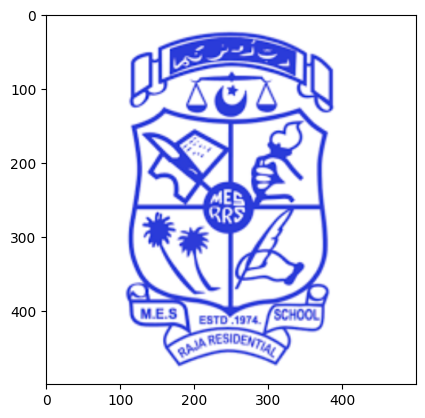

In [11]:
import matplotlib.pyplot as plt
plt.imshow(img[0])